In [1]:
from utils.plotter import get_roc_curves_from_df
from utils.wandb_calls import fetch_files_from_runs
import os
import pandas as pd
import pickle
import shutil

In [2]:
def append_row(table, row):
        return pd.concat([
                    table, 
                    pd.DataFrame([row], columns=row.index)]
            ).reset_index(drop=True)

2024-05-27 12:59:51.256797+00:00 2024-05-27 01:40:01.859141 44389.3976559639


False

In [3]:
project = "node_realism"
group = "acdc"
import wandb 
api = wandb.Api()
runs = api.runs(f"{project}")
df = pd.DataFrame(columns = ["run", "threshold", "score", "weights"])
for run in runs:
    # # run was created in past 2 hours, df = df_100 else df = df_510
    # if run.state == "finished" and "acdc" in run.group:
    #         case = int(run.group.split("_")[1])
    #         threshold = float(run.name)
    #         score = run.summary["score"]
    #         print(type(run.created_at), pd.Timestamp.now() - pd.Timedelta(hours=2))
    #         if run.created_at > pd.Timestamp.now() - pd.Timedelta(hours=2):
    #             entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": 100})
    #         else:
    #             entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": 510})
    #         df = append_row(df, entry)

    if "acdc" in run.group:
        case = int(run.group.split("_")[1])
        weights = (run.group.split("_")[-1])
        threshold = float(run.name)
        score = run.summary["score"]
        entry = pd.Series({"run": case, "threshold": threshold, "score": score, "weights": weights})
        df = append_row(df, entry)

/var/folders/_k/_46xyqdj165bdcyw79k6758w0000gn/T/ipykernel_69244/3283792187.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([


In [4]:
df

,run,threshold,score,weights
0,16,100.00000,1,100
1,16,50.00000,1,100
2,16,20.00000,1,100
3,16,10.00000,1,100
4,16,1.00000,1,100
...,...,...,...,...
440,8,0.00000,0.214126,tracr
441,3,0.00000,0.231445,510
442,3,0.00001,0.285938,tracr
443,24,0.00000,1,tracr


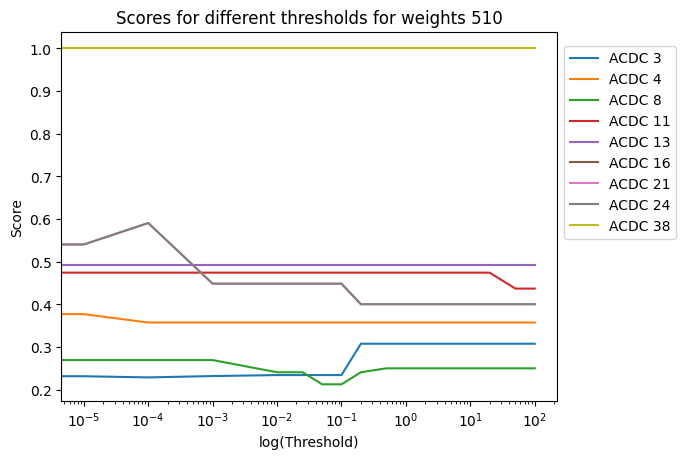

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_scores_for_weights(df, weights):
    for run, group in df[df["weights"] == weights].groupby("run"):
        group = group.sort_values("threshold", ascending=False)
        plt.plot(group["threshold"],
                group["score"], 
                label=f"ACDC {run}")
        # plot in log scale
        plt.xscale("log")

    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))

    plt.xlabel("log(Threshold)")
    plt.ylabel("Score")
    plt.title(f"Scores for different thresholds for weights {weights}")
    plt.show()

plot_scores_for_weights(df, "510")

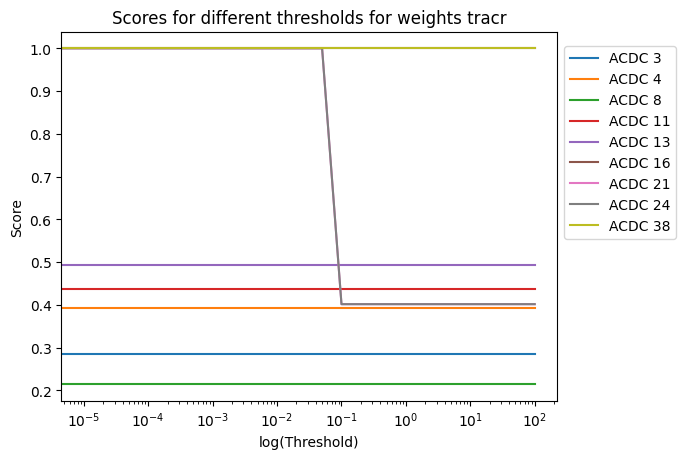

In [9]:
plot_scores_for_weights(df, "tracr")

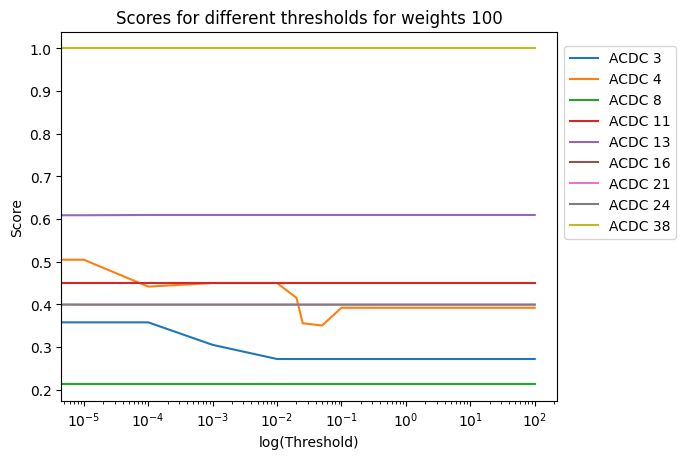

In [10]:
plot_scores_for_weights(df, "100")